In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

child = pd.read_csv('stud_math.csv')

In [571]:
display(child.head(10))
child.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [572]:
#Т.к. в таблице есть колонки со значением Nan, заменим их на значения часто встречавшийся в этой колонке
for column in child.columns:
    mode_ = child[column].mode()[0]
    #print(child[column])
    child[column].fillna(value=mode_, inplace=True, axis=0)
display(child.head(20))
#mode_ = child.address.mode()
#child.address.fillna(value=mode_, inplace=True, axis=0)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [573]:
#Проведём первичный анализ таблицы с точки зрения логики:
#1)Выведем две таблицы, в одной score > 85 и во второй score < 20

In [526]:
#В таблице видно, что преобладающий возраст 15 - 16 лет, родители образованы, больше времени уделяют учёбе, здоровые ребята,
#отсутсвуют романтические отношения, есть не большие прогулы
#child[child.score > 85]

In [527]:
#В таблице видно, что преобладающий возраст 17 - 19 лет, родители менее образованы, меньше времени уделяют учёбе, со здоровьем не очень хорошо,
#есть романтические отношения,отсутствуют как ни странно прогулы
#child[child.score < 20]

In [528]:
#Вывод : с повышением возраста появляются романтические отношения и учёба переходит на второй план (в осном это девушки).
#Теперь от теории к практики.
#Корреляциооный анализ числовых столбцов. Из этих столбцов я выбрал наиболее значимые:
#'age', 'traveltime', 'studytime', 'freetime', 'goout', 'absences','score'

In [529]:
dynamics_by_age = child[['age', 'traveltime', 'studytime', 'freetime', 'goout', 'absences','score']] 

In [530]:
dynamics_by_age.corr()

,age,traveltime,studytime,freetime,goout,absences,score
age,1.000000,0.084755,-0.015355,0.026443,0.134069,0.090515,-0.155013
traveltime,0.084755,1.000000,-0.094637,-0.012496,0.051775,-0.036597,-0.056523
studytime,-0.015355,-0.094637,1.000000,-0.119014,-0.051090,-0.024824,0.113859
freetime,0.026443,-0.012496,-0.119014,1.000000,0.292305,0.006355,0.016694
goout,0.134069,0.051775,-0.051090,0.292305,1.000000,-0.052370,-0.127923
absences,0.090515,-0.036597,-0.024824,0.006355,-0.052370,1.000000,0.061142
score,-0.155013,-0.056523,0.113859,0.016694,-0.127923,0.061142,1.000000


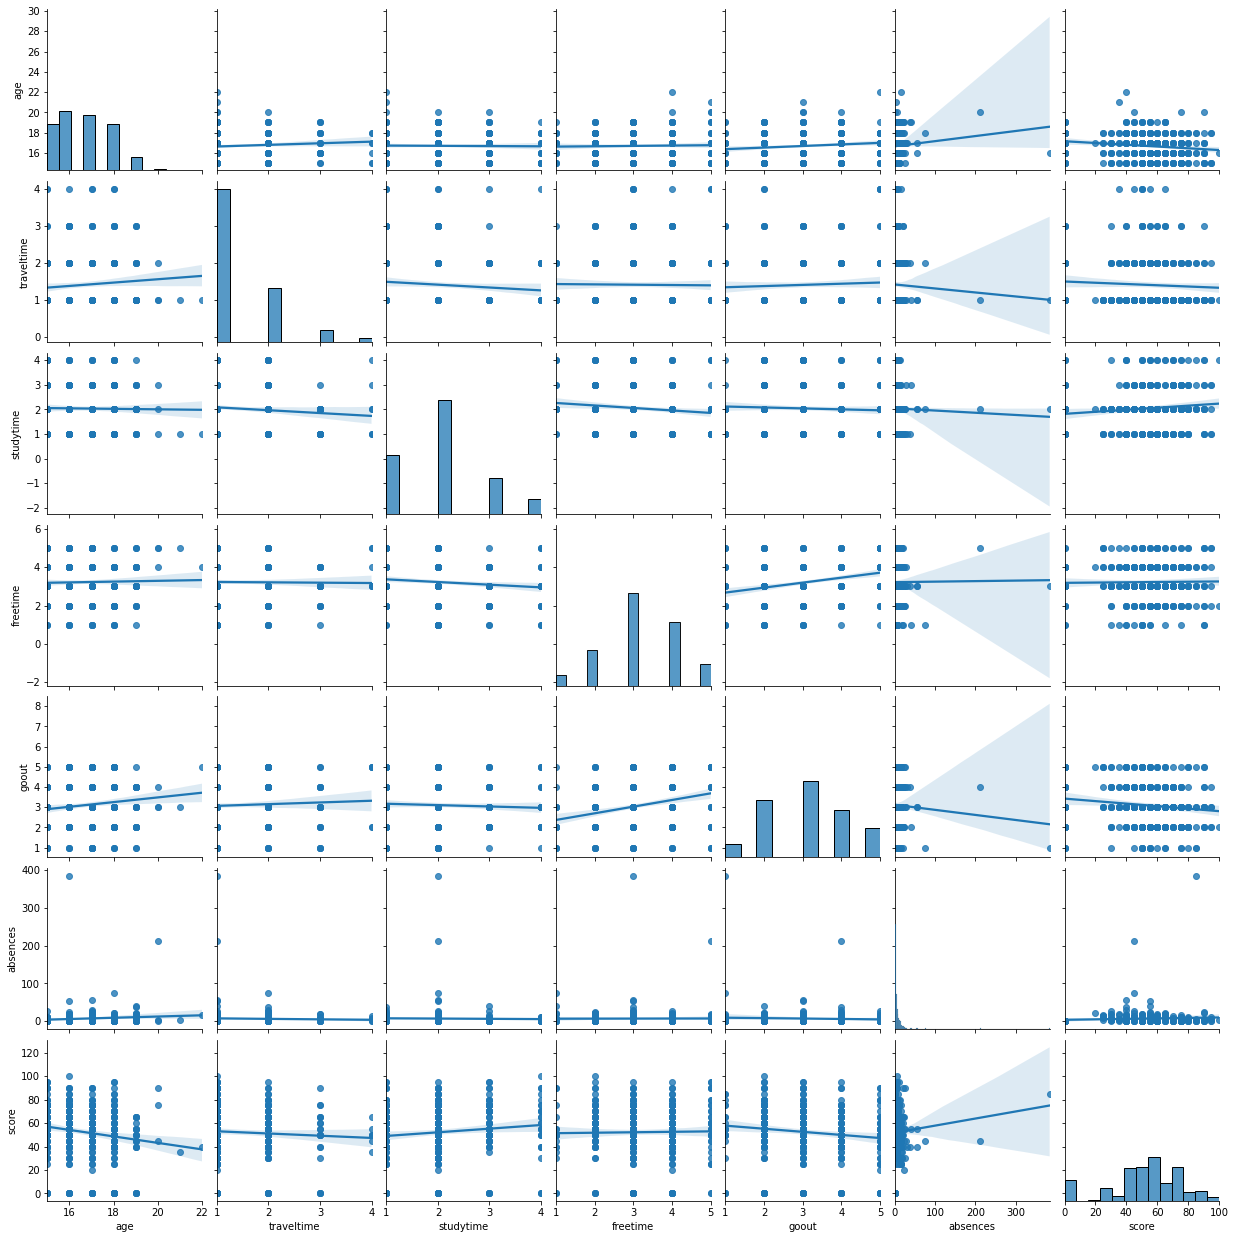

In [531]:
sns.pairplot(dynamics_by_age, kind = 'reg')

In [532]:
#Из графиков видно:
#1)С повышением возраста score уменьшается
#2)Количество прогулов увеличивается
#3)Проведение времени с друзьями увеличивается
#4)Свободное время незначительно увеличивается за счёт уменьшения времени на учёбу после школы
#5)Время в школу также увеличивается

In [533]:
#Теперь добавим в таблицу 'studytime, granular'
#Наблюдается действие обратные 'studytime'
#Складывается впечатление , что если в сутках было не 24 часа , а 32-38 часов и это дополнительное время мы потратим на учёбу.
dynamics_by_age2 = child[['age', 'traveltime', 'studytime, granular','studytime', 'freetime', 'goout', 'absences','score']] 

In [534]:
dynamics_by_age.corr()

,age,traveltime,studytime,freetime,goout,absences,score
age,1.000000,0.084755,-0.015355,0.026443,0.134069,0.090515,-0.155013
traveltime,0.084755,1.000000,-0.094637,-0.012496,0.051775,-0.036597,-0.056523
studytime,-0.015355,-0.094637,1.000000,-0.119014,-0.051090,-0.024824,0.113859
freetime,0.026443,-0.012496,-0.119014,1.000000,0.292305,0.006355,0.016694
goout,0.134069,0.051775,-0.051090,0.292305,1.000000,-0.052370,-0.127923
absences,0.090515,-0.036597,-0.024824,0.006355,-0.052370,1.000000,0.061142
score,-0.155013,-0.056523,0.113859,0.016694,-0.127923,0.061142,1.000000


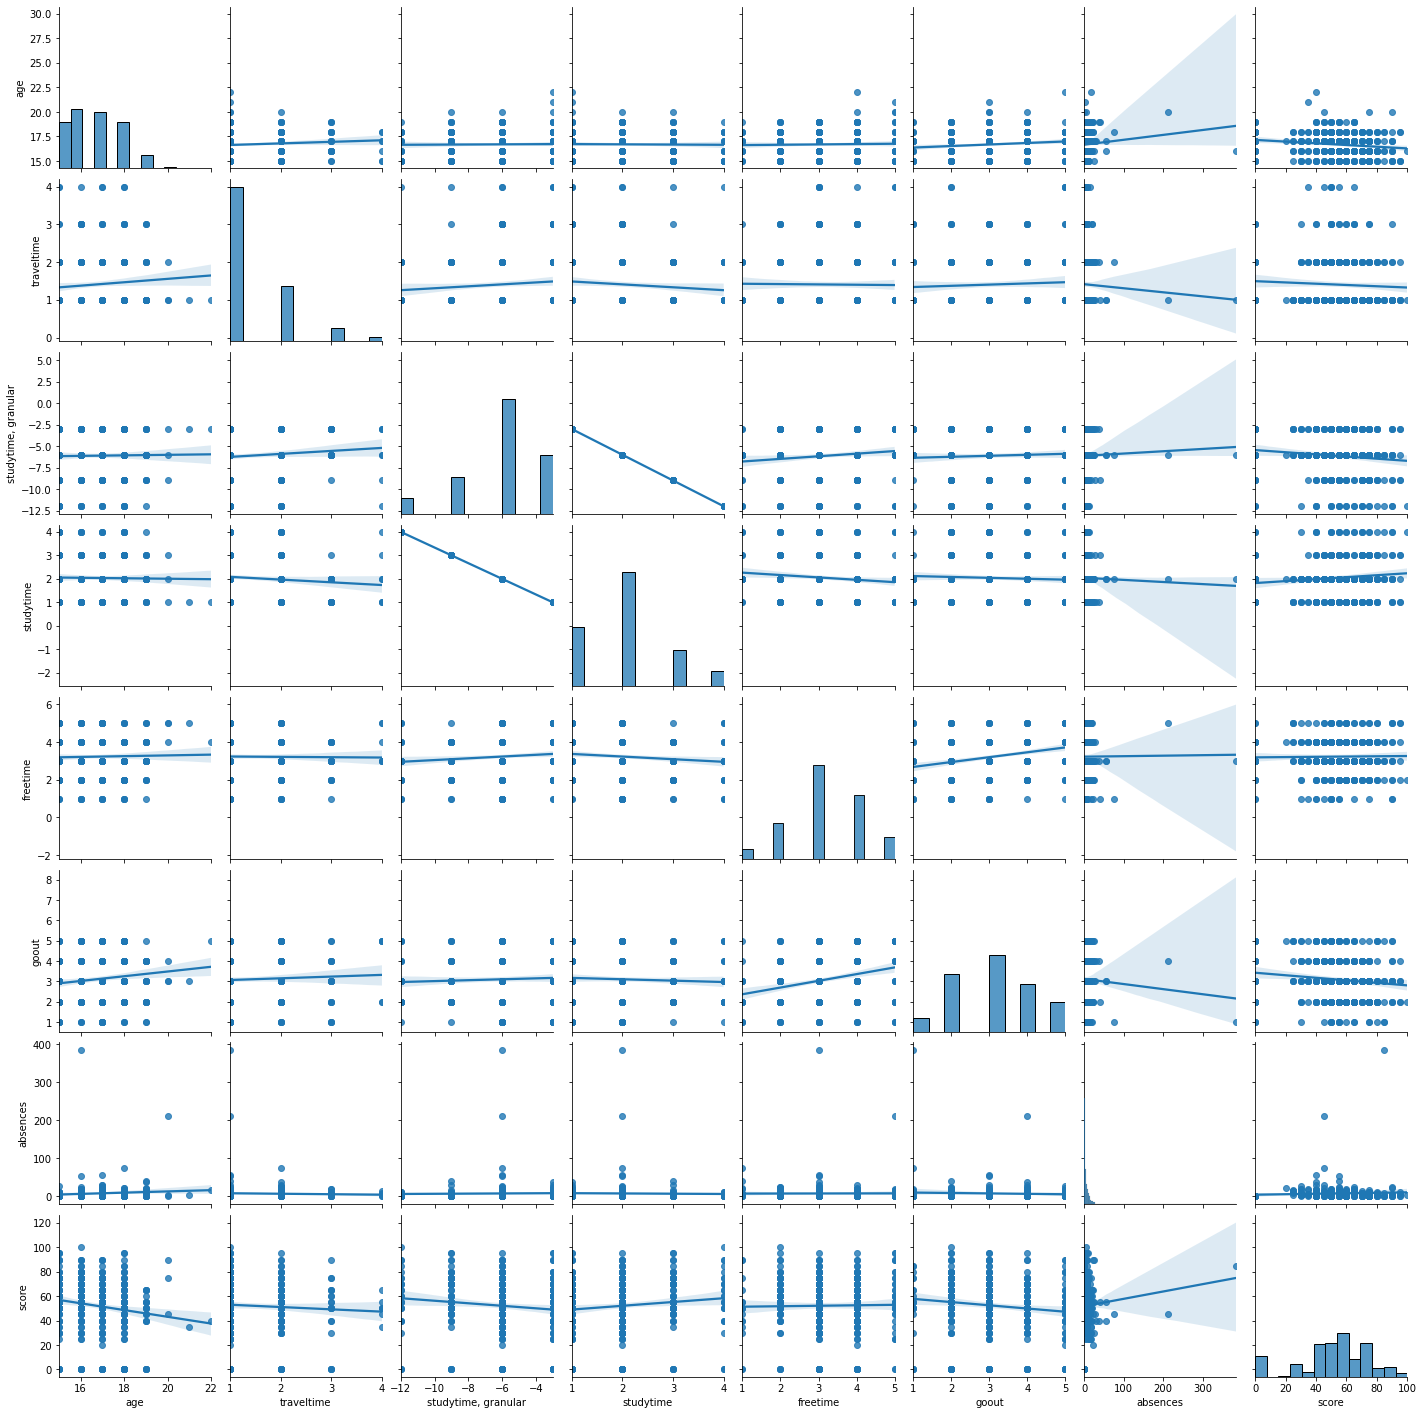

In [535]:
sns.pairplot(dynamics_by_age2, kind = 'reg')

In [536]:
dynamics_by_age3 = child[['Mjob', 'Fjob', 'reason', 'famsup', 'paid','higher','internet','romantic','schoolsup']] 

In [ ]:
#Далее избавляемся от выбросов по каждому столбику

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

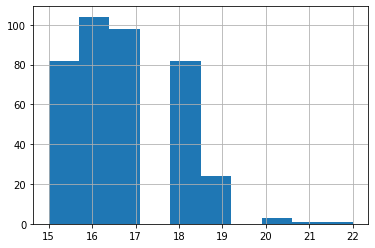

In [537]:
display(pd.DataFrame(child.age.value_counts()))
child.age.hist()
child.age.describe()

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

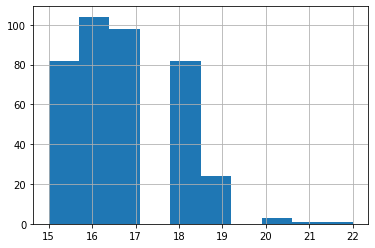

In [538]:
display(pd.DataFrame(child.age.value_counts()))
child.age.hist()
child.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


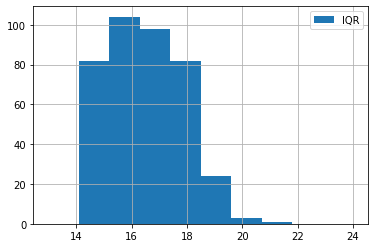

In [539]:
IQRage = child.age.quantile(0.75) - child.age.quantile(0.25)
perc25age = child.age.quantile(0.25)
perc75age = child.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25age),
'75-й перцентиль: {},'.format(perc75age),
"IQR: {}, ".format(IQRage),
"Границы выбросов: [{f}, {l}].".format(f=perc25age - 1.5*IQRage, l=perc75age + 1.5*IQRage))
 
child.age.loc[child.age.between(
perc25age - 1.5*IQRage,
perc75age + 1.5*IQRage)].hist(bins = 10, range = (13, 24), label = 'IQR')
 
plt.legend();

In [582]:
child = child.loc[child.age <= 19]

,Medu
4.0,130
2.0,97
3.0,87
1.0,50
0.0,2


count    366.000000
mean       2.800546
std        1.085950
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

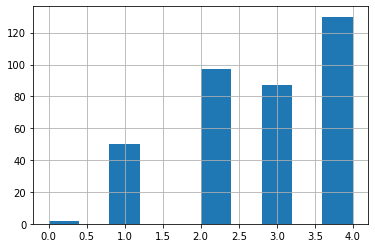

In [541]:
display(pd.DataFrame(child.Medu.value_counts()))
child.Medu.hist()
child.Medu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


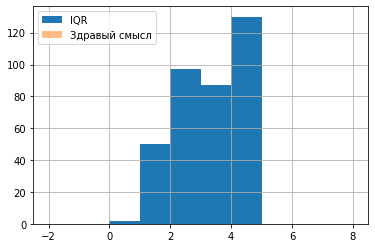

In [542]:
IQRMedu = child.Medu.quantile(0.75) - child.Medu.quantile(0.25)
perc25Medu = child.Medu.quantile(0.25)
perc75Medu = child.Medu.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25Medu),
'75-й перцентиль: {},'.format(perc75Medu),
"IQR: {}, ".format(IQRMedu),
"Границы выбросов: [{f}, {l}].".format(f=perc25Medu - 1.5*IQRMedu, l=perc75Medu + 1.5*IQRMedu))
 
child.Medu.loc[child.Medu.between(
perc25Medu - 1.5*IQRMedu,
perc75Medu + 1.5*IQRMedu)].hist(bins = 10, range = (-2, 8), label = 'IQR')
 
child.Medu.loc[child.Medu > 5].hist(
alpha = 0.5, bins = 10, range = (-2, 8), label = 'Здравый смысл')
 
plt.legend();

,Fedu
2.0,122
3.0,89
4.0,86
1.0,66
0.0,2
40.0,1


count    366.000000
mean       2.625683
std        2.225456
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

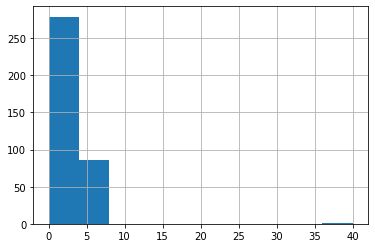

In [543]:
display(pd.DataFrame(child.Fedu.value_counts()))
child.Fedu.hist()
child.Fedu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


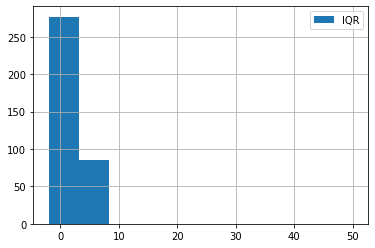

In [544]:
IQRFedu = child.Fedu.quantile(0.75) - child.Fedu.quantile(0.25)
perc25Fedu = child.Fedu.quantile(0.25)
perc75Fedu = child.Fedu.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25Fedu),
'75-й перцентиль: {},'.format(perc75Fedu),
"IQR: {}, ".format(IQRFedu),
"Границы выбросов: [{f}, {l}].".format(f=perc25Fedu - 1.5*IQRFedu, l=perc75Fedu + 1.5*IQRFedu))
 
child.Fedu.loc[child.Fedu.between(
perc25Fedu - 1.5*IQRFedu,
perc75Fedu + 1.5*IQRFedu)].hist(bins = 10, range = (-2, 50), label = 'IQR')
 
plt.legend();

In [575]:
child = child.loc[(child.Fedu >= 1) & (child.Fedu <= 10)]

,Mjob
other,140
services,86
at_home,54
teacher,53
health,30


count       363
unique        5
top       other
freq        140
Name: Mjob, dtype: object

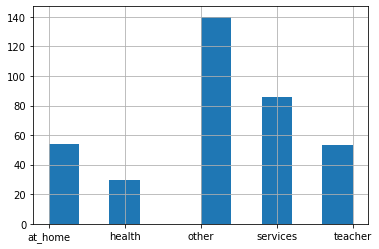

In [546]:
display(pd.DataFrame(child.Mjob.value_counts()))
child.Mjob.hist()
child.Mjob.describe()

,Fjob
other,216
services,91
teacher,29
health,14
at_home,13


count       363
unique        5
top       other
freq        216
Name: Fjob, dtype: object

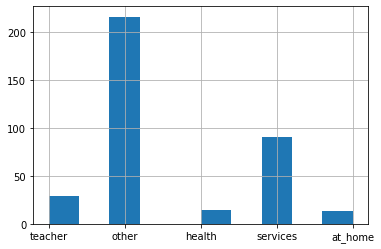

In [547]:
display(pd.DataFrame(child.Fjob.value_counts()))
child.Fjob.hist()
child.Fjob.describe()

,reason
course,145
home,94
reputation,93
other,31


count        363
unique         4
top       course
freq         145
Name: reason, dtype: object

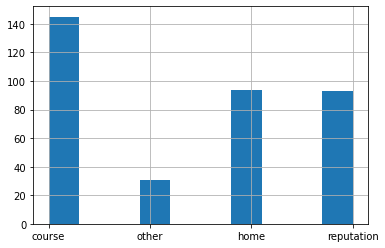

In [548]:
display(pd.DataFrame(child.reason.value_counts()))
child.reason.hist()
child.reason.describe()

,traveltime
1.0,250
2.0,88
3.0,18
4.0,7


count    363.000000
mean       1.399449
std        0.675294
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

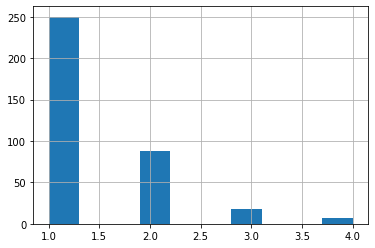

In [549]:
display(pd.DataFrame(child.traveltime.value_counts()))
child.traveltime.hist()
child.traveltime.describe()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


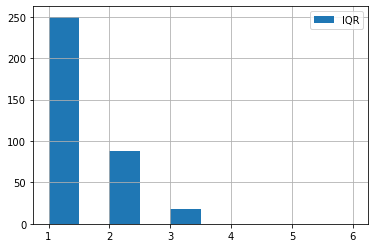

In [550]:
IQRtraveltime = child.traveltime.quantile(0.75) - child.traveltime.quantile(0.25)
perc25traveltime = child.traveltime.quantile(0.25)
perc75traveltime = child.traveltime.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25traveltime),
'75-й перцентиль: {},'.format(perc75traveltime),
"IQR: {}, ".format(IQRtraveltime),
"Границы выбросов: [{f}, {l}].".format(f=perc25traveltime - 1.5*IQRtraveltime, l=perc75traveltime + 1.5*IQRtraveltime))
 
child.traveltime.loc[child.traveltime.between(
perc25traveltime - 1.5*IQRtraveltime,
perc75traveltime + 1.5*IQRtraveltime)].hist(bins = 10, range = (1, 6), label = 'IQR')
 
plt.legend();

In [602]:
child = child.loc[child.traveltime > 1.8]

,studytime
1.0,3
2.0,2
3.0,1
4.0,1


count    7.000000
mean     2.000000
std      1.154701
min      1.000000
25%      1.000000
50%      2.000000
75%      2.500000
max      4.000000
Name: studytime, dtype: float64

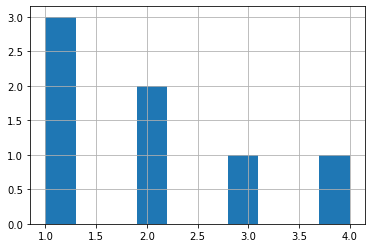

In [552]:
display(pd.DataFrame(child.studytime.value_counts()))
child.studytime.hist()
child.studytime.describe()

,failures
0.0,5
3.0,2


count    7.000000
mean     0.857143
std      1.463850
min      0.000000
25%      0.000000
50%      0.000000
75%      1.500000
max      3.000000
Name: failures, dtype: float64

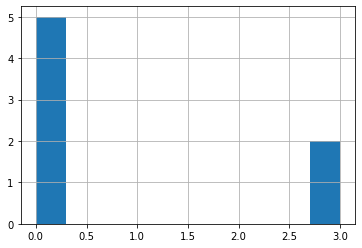

In [553]:
display(pd.DataFrame(child.failures.value_counts()))
child.failures.hist()
child.failures.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


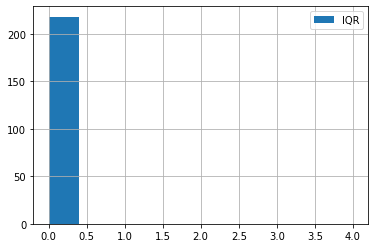

In [584]:
IQRfailures = child.failures.quantile(0.75) - child.failures.quantile(0.25)
perc25failures = child.failures.quantile(0.25)
perc75failures = child.failures.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25failures),
'75-й перцентиль: {},'.format(perc75failures),
"IQR: {}, ".format(IQRfailures),
"Границы выбросов: [{f}, {l}].".format(f=perc25failures - 1.5*IQRfailures, l=perc75failures + 1.5*IQRfailures))
 
child.failures.loc[child.failures.between(
perc25failures - 1.5*IQRfailures,
perc75failures + 1.5*IQRfailures)].hist(bins = 10, range = (0, 4), label = 'IQR')
 
plt.legend();

In [589]:
child = child.loc[child.failures <= 0.4]

,famrel
4.0,4
5.0,2
1.0,1


count    7.000000
mean     3.857143
std      1.345185
min      1.000000
25%      4.000000
50%      4.000000
75%      4.500000
max      5.000000
Name: famrel, dtype: float64

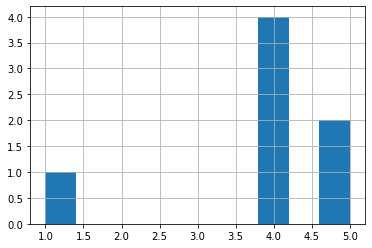

In [554]:
display(pd.DataFrame(child.famrel.value_counts()))
child.famrel.hist()
child.famrel.describe()

25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].


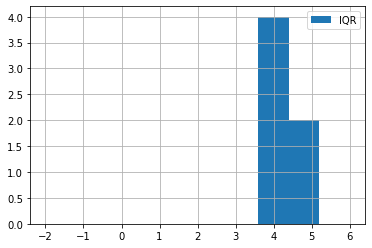

In [555]:
IQRfamrel = child.famrel.quantile(0.75) - child.famrel.quantile(0.25)
perc25famrel = child.famrel.quantile(0.25)
perc75famrel = child.famrel.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25famrel),
'75-й перцентиль: {},'.format(perc75famrel),
"IQR: {}, ".format(IQRfamrel),
"Границы выбросов: [{f}, {l}].".format(f=perc25famrel - 1.5*IQRfamrel, l=perc75famrel + 1.5*IQRfamrel))
 
child.famrel.loc[child.famrel.between(
perc25famrel - 1.5*IQRfamrel,
perc75famrel + 1.5*IQRfamrel)].hist(bins = 10, range = (-2, 6), label = 'IQR')
 
plt.legend();

In [609]:
child = child.loc[(child.famrel >= 3.25) & (child.famrel <= 5.25)]

,freetime
3.0,3
5.0,2
4.0,1


count    6.000000
mean     3.833333
std      0.983192
min      3.000000
25%      3.000000
50%      3.500000
75%      4.750000
max      5.000000
Name: freetime, dtype: float64

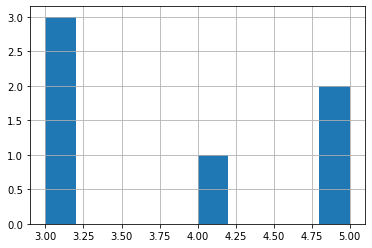

In [557]:
display(pd.DataFrame(child.freetime.value_counts()))
child.freetime.hist()
child.freetime.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


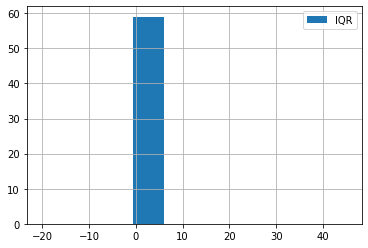

In [604]:
IQRfreetime = child.freetime.quantile(0.75) - child.freetime.quantile(0.25)
perc25freetime = child.freetime.quantile(0.25)
perc75freetime = child.freetime.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25freetime),
'75-й перцентиль: {},'.format(perc75freetime),
"IQR: {}, ".format(IQRfreetime),
"Границы выбросов: [{f}, {l}].".format(f=perc25freetime - 1.5*IQRfreetime, l=perc75freetime + 1.5*IQRfreetime))
 
child.freetime.loc[child.freetime.between(
perc25freetime - 1.5*IQRabsences,
perc75freetime + 1.5*IQRfreetime)].hist(bins = 10, range = (-20, 45), label = 'IQR')
 
plt.legend();

In [607]:
child = child.loc[child.freetime > 1]

,goout
5.0,4
2.0,2


count    6.000000
mean     4.000000
std      1.549193
min      2.000000
25%      2.750000
50%      5.000000
75%      5.000000
max      5.000000
Name: goout, dtype: float64

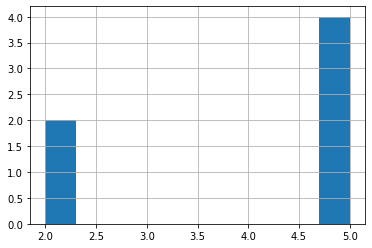

In [558]:
display(pd.DataFrame(child.goout.value_counts()))
child.goout.hist()
child.goout.describe()

,absences
0.0,2
8.0,1
2.0,1
6.0,1
14.0,1


Значений, встретившихся в столбце более 10 раз: 0


count     6.000000
mean      5.000000
std       5.477226
min       0.000000
25%       0.500000
50%       4.000000
75%       7.500000
max      14.000000
Name: absences, dtype: float64

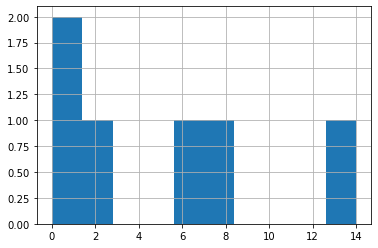

In [559]:
display(pd.DataFrame(child.absences.value_counts()).sort_values(['absences'],ascending=False))
print("Значений, встретившихся в столбце более 10 раз:", (child.absences.value_counts()>10).sum())
child.absences.hist()
child.absences.describe()

25-й перцентиль: 0.5, 75-й перцентиль: 7.5, IQR: 7.0,  Границы выбросов: [-10.0, 18.0].


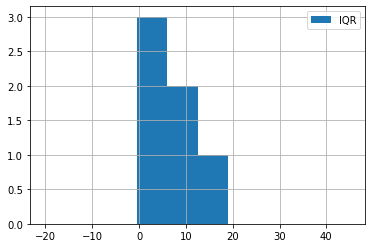

In [560]:
IQRabsences = child.absences.quantile(0.75) - child.absences.quantile(0.25)
perc25absences = child.absences.quantile(0.25)
perc75absences = child.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25absences),
'75-й перцентиль: {},'.format(perc75absences),
"IQR: {}, ".format(IQRabsences),
"Границы выбросов: [{f}, {l}].".format(f=perc25absences - 1.5*IQRabsences, l=perc75absences + 1.5*IQRabsences))
 
child.absences.loc[child.absences.between(
perc25absences - 1.5*IQRabsences,
perc75absences + 1.5*IQRabsences)].hist(bins = 10, range = (-20, 45), label = 'IQR')
 
plt.legend();

In [600]:
child = child.loc[child.absences < 16]

,score
50.0,3
45.0,1
35.0,1
55.0,1


Значений, встретившихся в столбце более 10 раз: 0


count     6.000000
mean     47.500000
std       6.892024
min      35.000000
25%      46.250000
50%      50.000000
75%      50.000000
max      55.000000
Name: score, dtype: float64

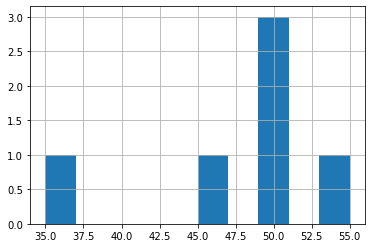

In [562]:
display(pd.DataFrame(child.score.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (child.score.value_counts()>10).sum())
child.score.hist()
child.score.describe()

25-й перцентиль: 46.25, 75-й перцентиль: 50.0, IQR: 3.75,  Границы выбросов: [40.625, 55.625].


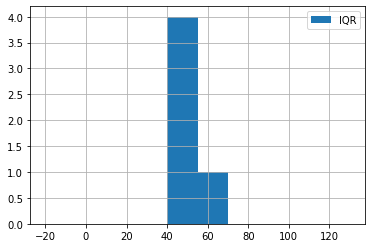

In [563]:
IQRscore = child.score.quantile(0.75) - child.score.quantile(0.25)
perc25score = child.score.quantile(0.25)
perc75score = child.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25score),
'75-й перцентиль: {},'.format(perc75score),
"IQR: {}, ".format(IQRscore),
"Границы выбросов: [{f}, {l}].".format(f=perc25score - 1.5*IQRscore, l=perc75score + 1.5*IQRscore))
 
child.score.loc[child.score.between(
perc25score - 1.5*IQRscore,
perc75score + 1.5*IQRscore)].hist(bins = 10, range = (-20, 130), label = 'IQR')
 
plt.legend();

In [593]:
child = child.loc[(child.score >= 10) & (child.score <= 100)]

,"studytime, granular"
-3.0,3
-6.0,2
-9.0,1


Значений, встретившихся в столбце более 10 раз: 0


count    6.00000
mean    -5.00000
std      2.44949
min     -9.00000
25%     -6.00000
50%     -4.50000
75%     -3.00000
max     -3.00000
Name: studytime, granular, dtype: float64

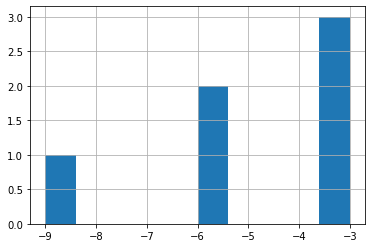

In [565]:
display(pd.DataFrame(child['studytime, granular'].value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (child['studytime, granular'].value_counts()>10).sum())
child['studytime, granular'].hist()
child['studytime, granular'].describe()

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


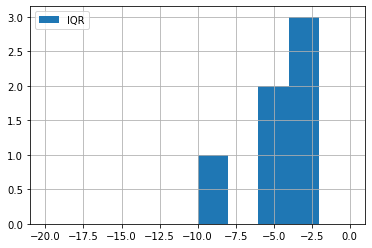

In [566]:
IQRsq = child['studytime, granular'].quantile(0.75) - child['studytime, granular'].quantile(0.25)
perc25sq = child['studytime, granular'].quantile(0.25)
perc75sq = child['studytime, granular'].quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25sq),
'75-й перцентиль: {},'.format(perc75sq),
"IQR: {}, ".format(IQRsq),
"Границы выбросов: [{f}, {l}].".format(f=perc25sq - 1.5*IQRsq, l=perc75sq + 1.5*IQRsq))
 
child['studytime, granular'].loc[child['studytime, granular'].between(
perc25sq - 1.5*IQRsq,
perc75sq + 1.5*IQRsq)].hist(bins = 10, range = (-20, 0), label = 'IQR')
 
#child.score.loc[child.score <= 18].hist(
#alpha = 0.5, bins = 10, range = (-20, 130), label = 'Здравый смысл')
 
plt.legend();

In [579]:
child = child.loc[(child['studytime, granular'] >= -7) ]

In [568]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (19, 19))
    sns.boxplot( 
                data=child.loc[child.loc[:, column].isin(child.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

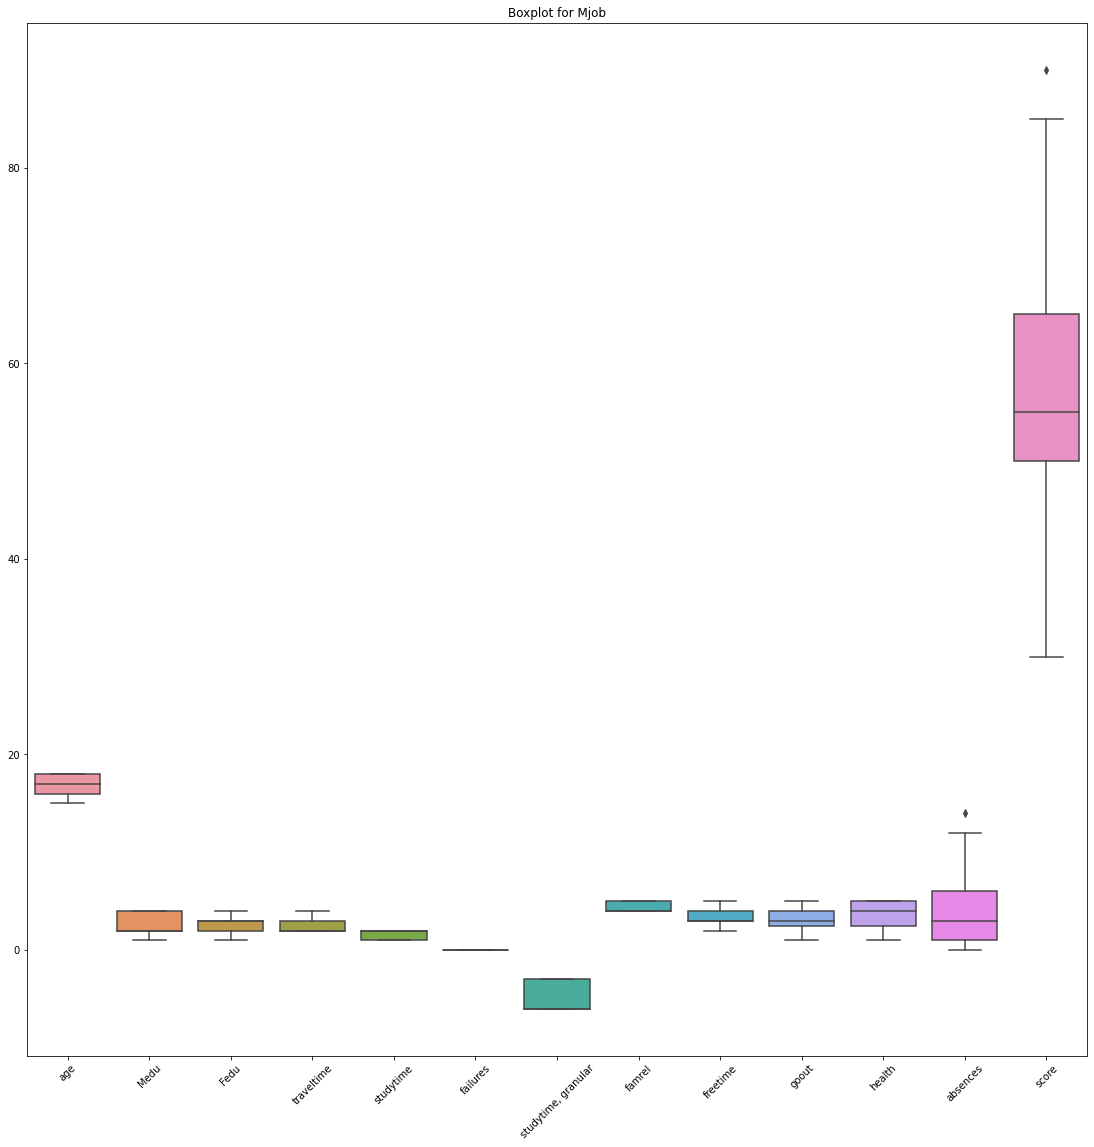

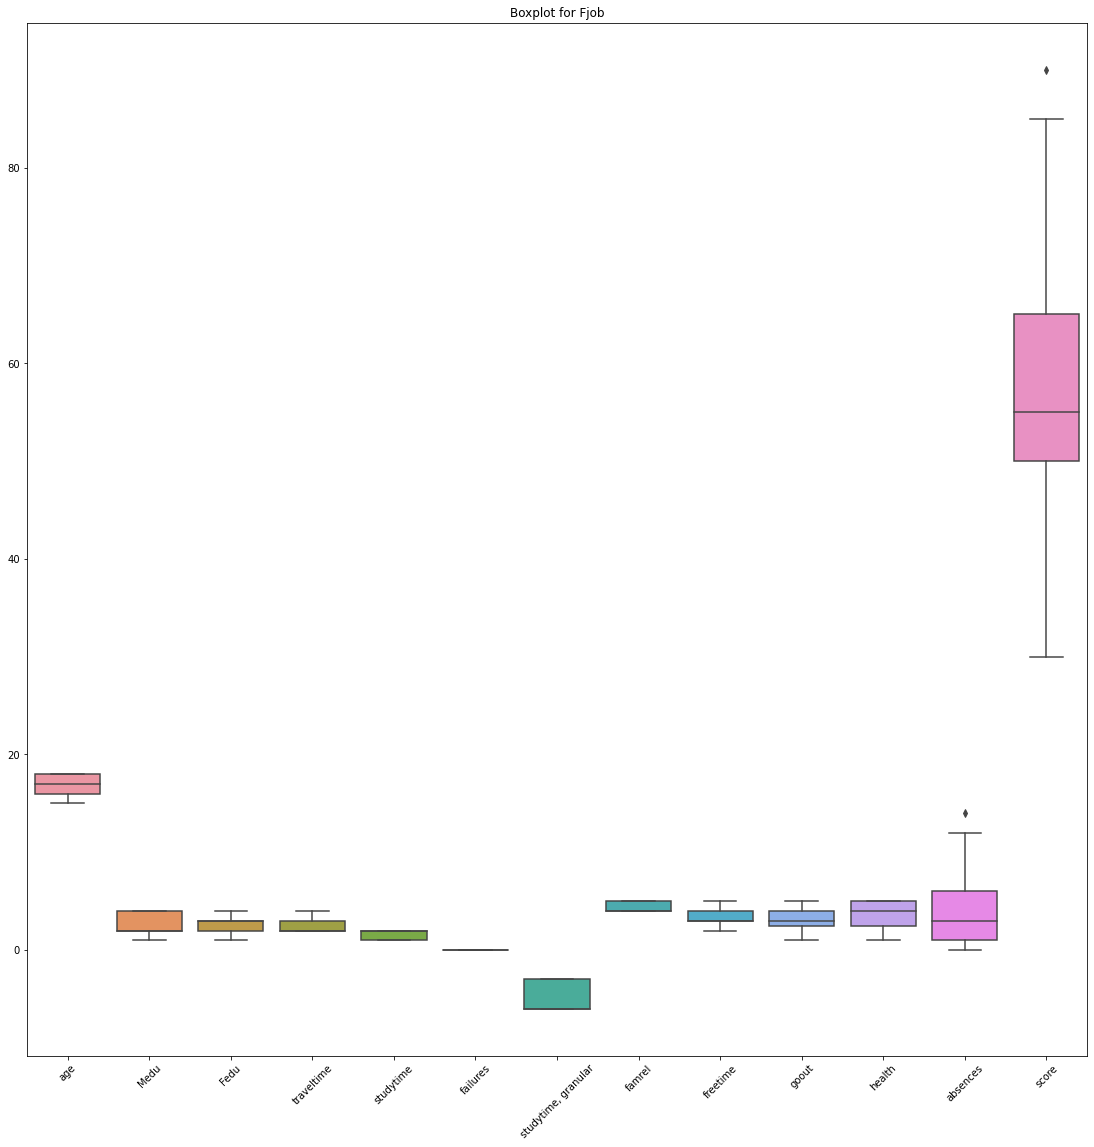

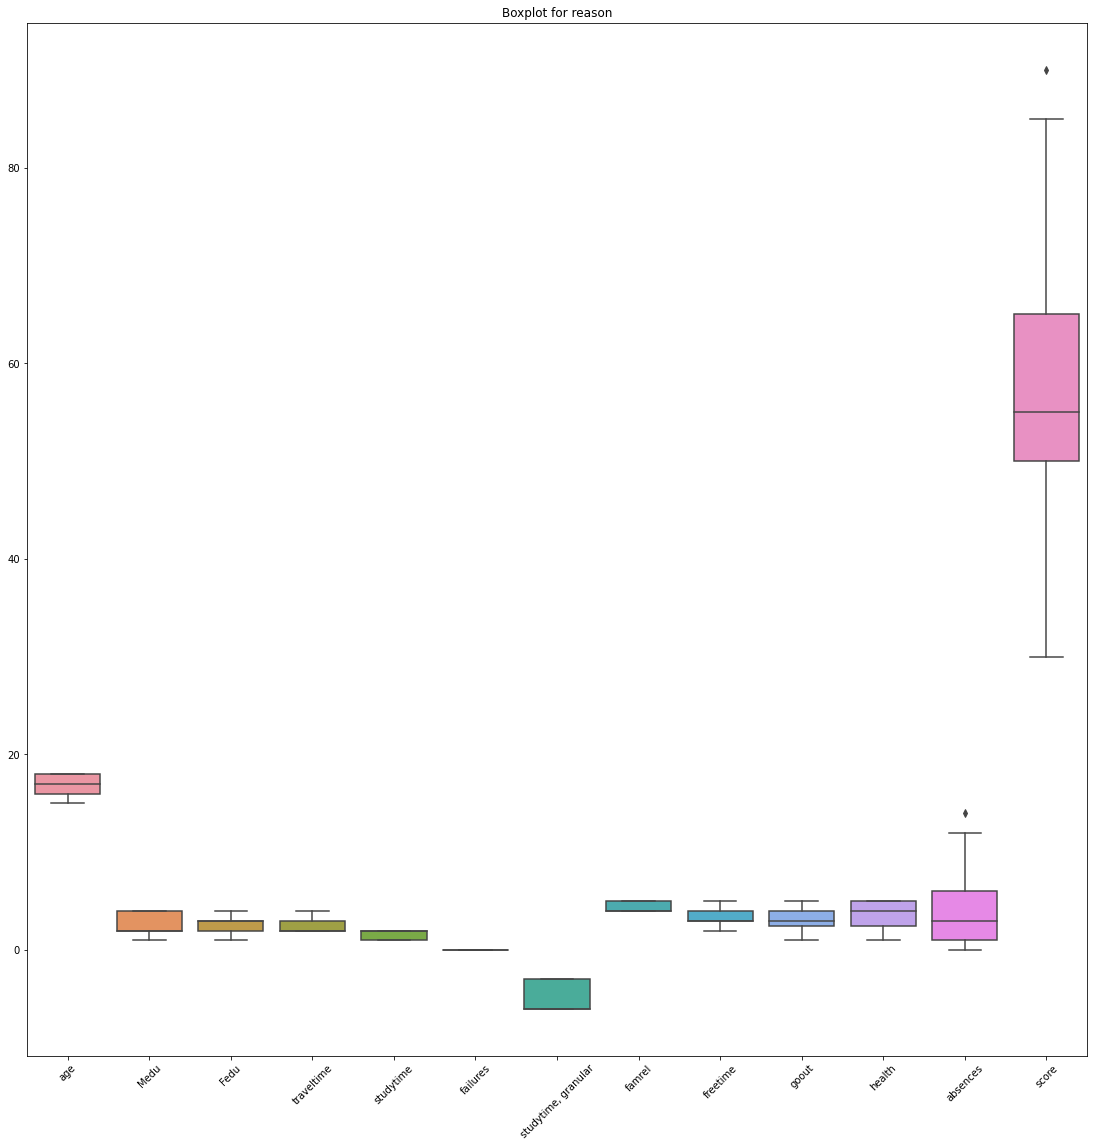

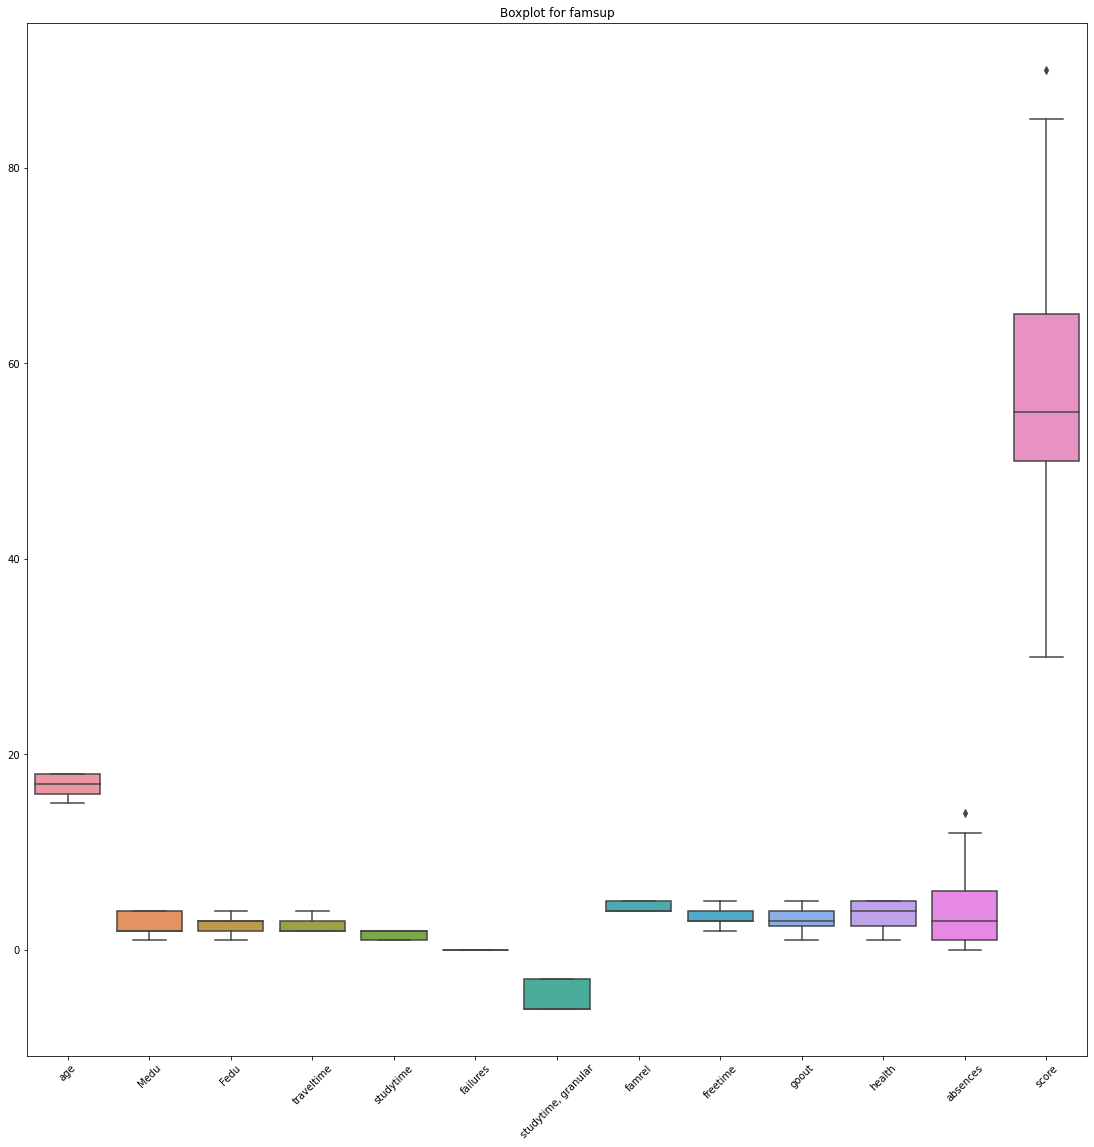

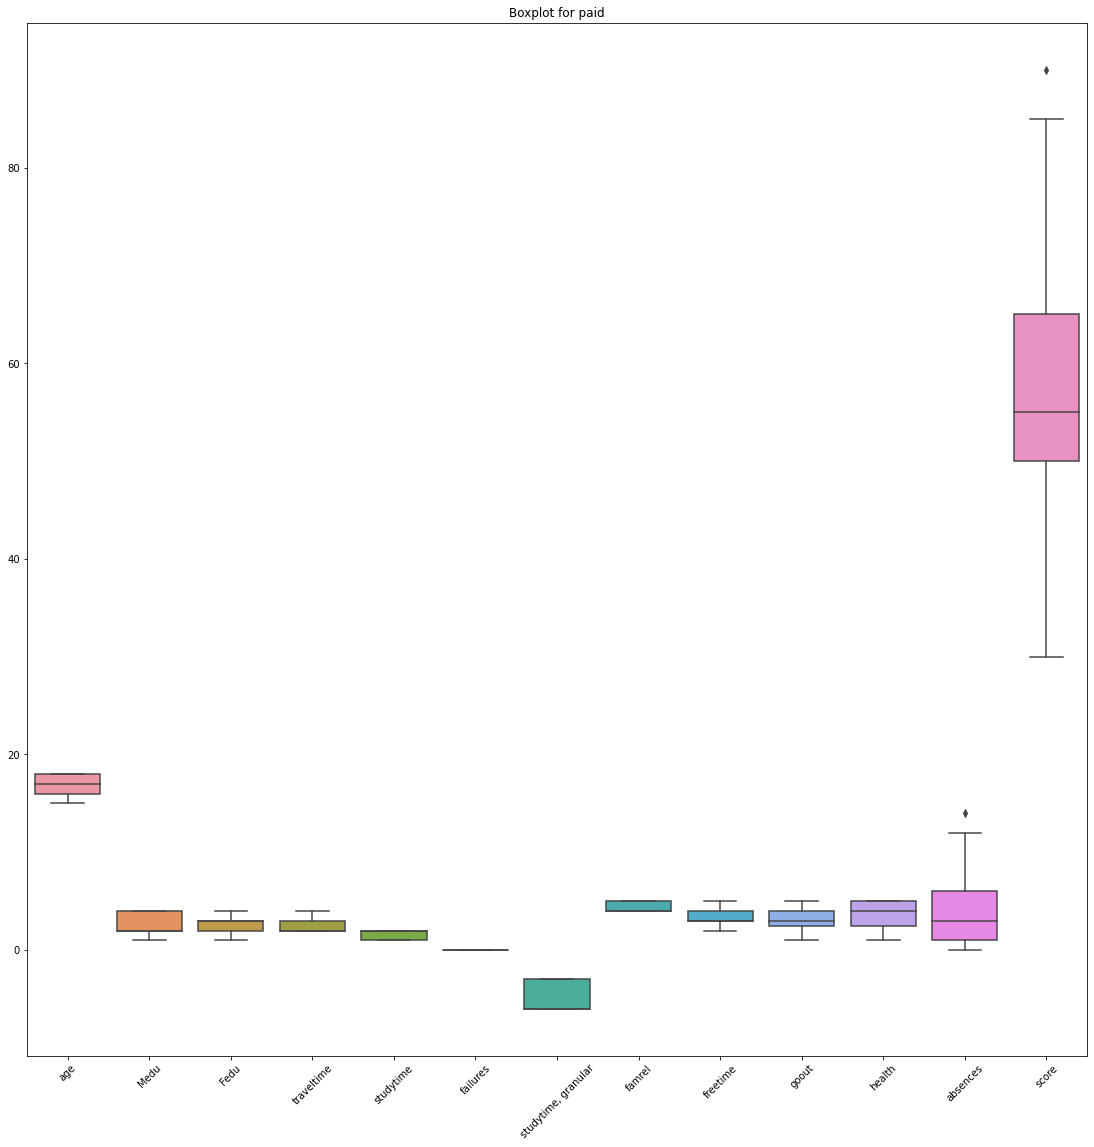

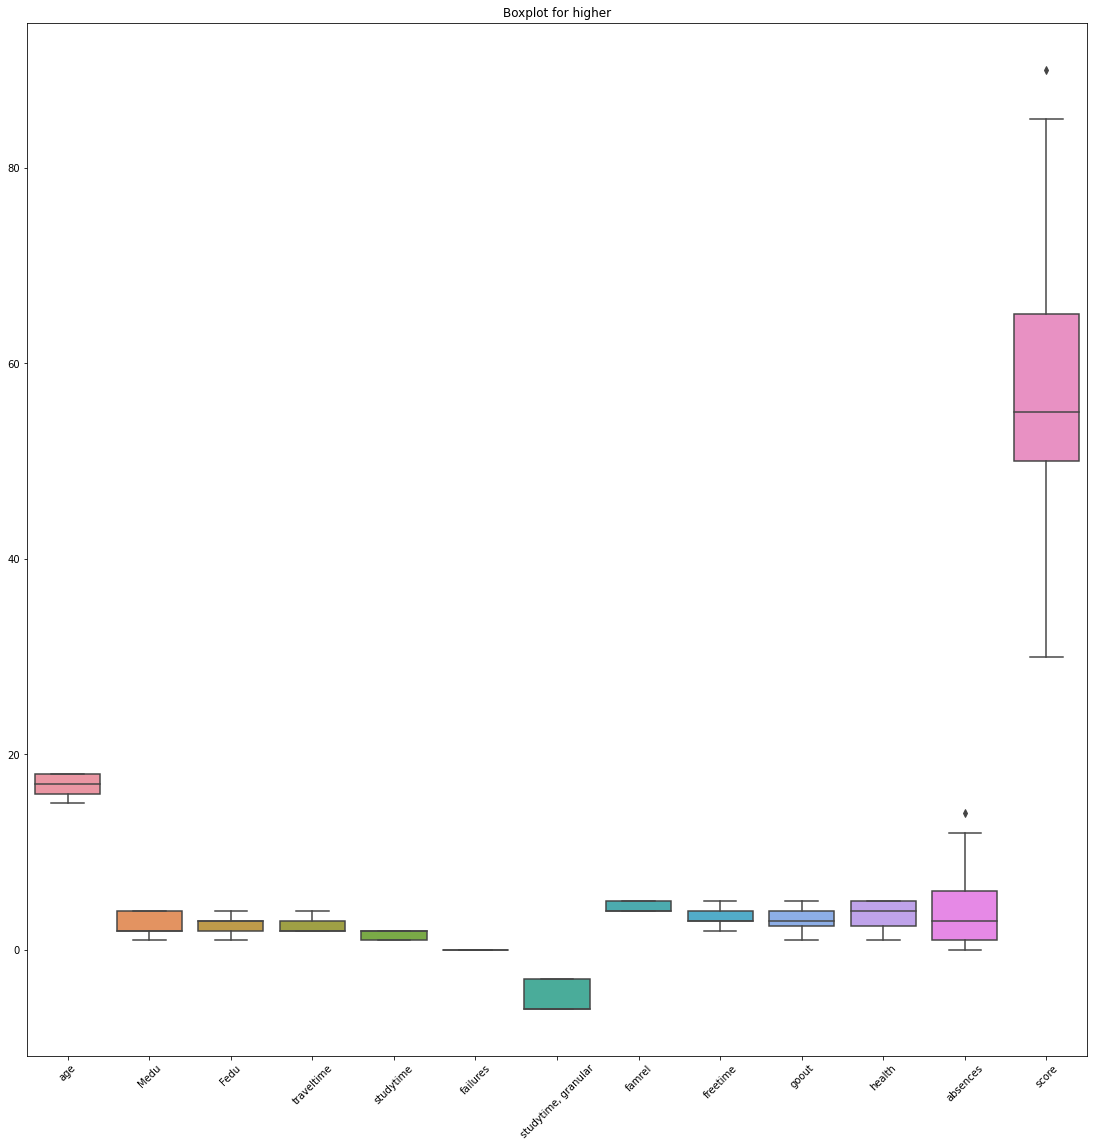

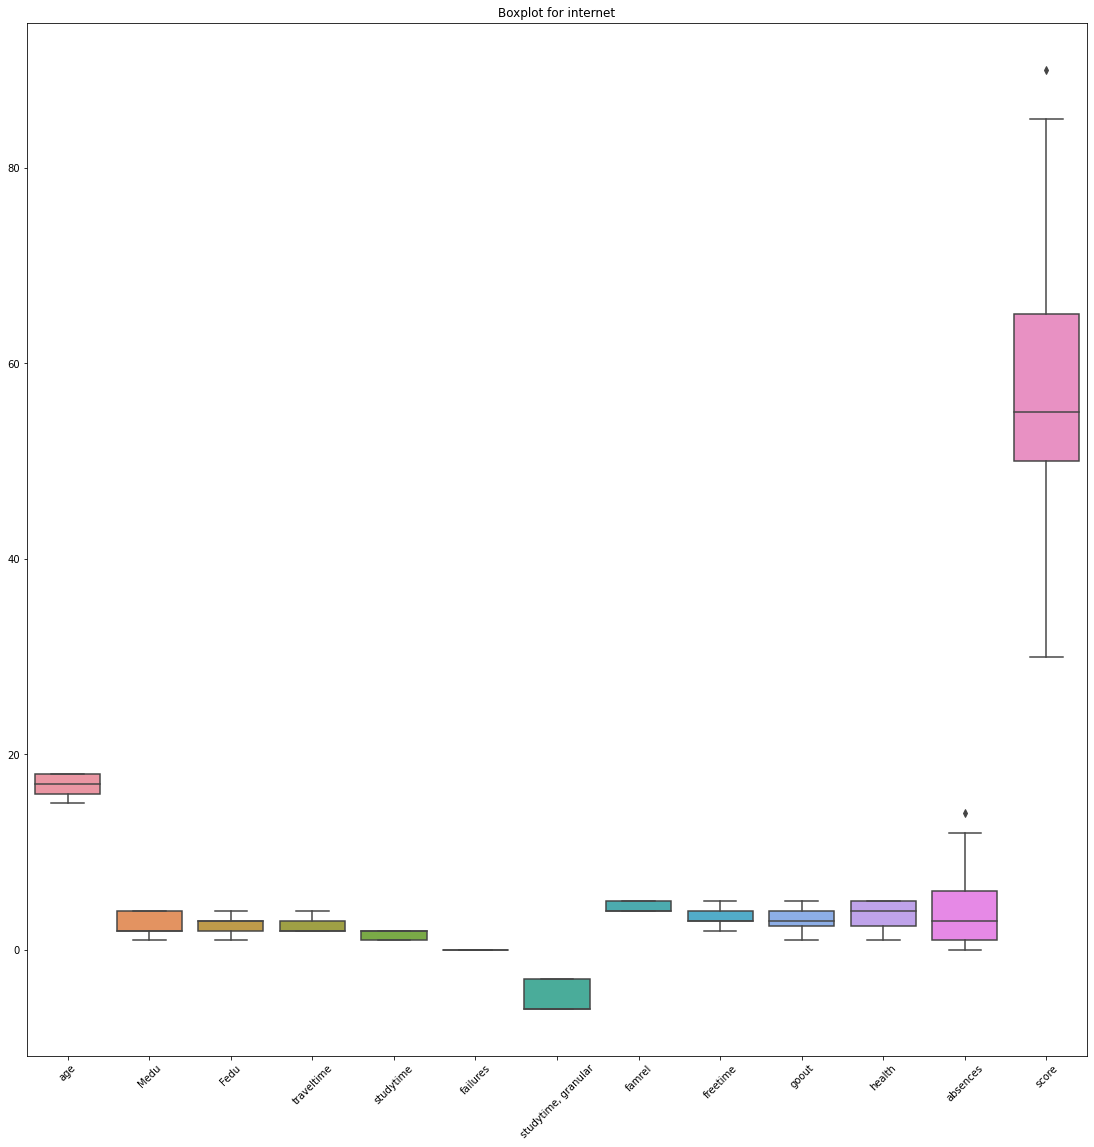

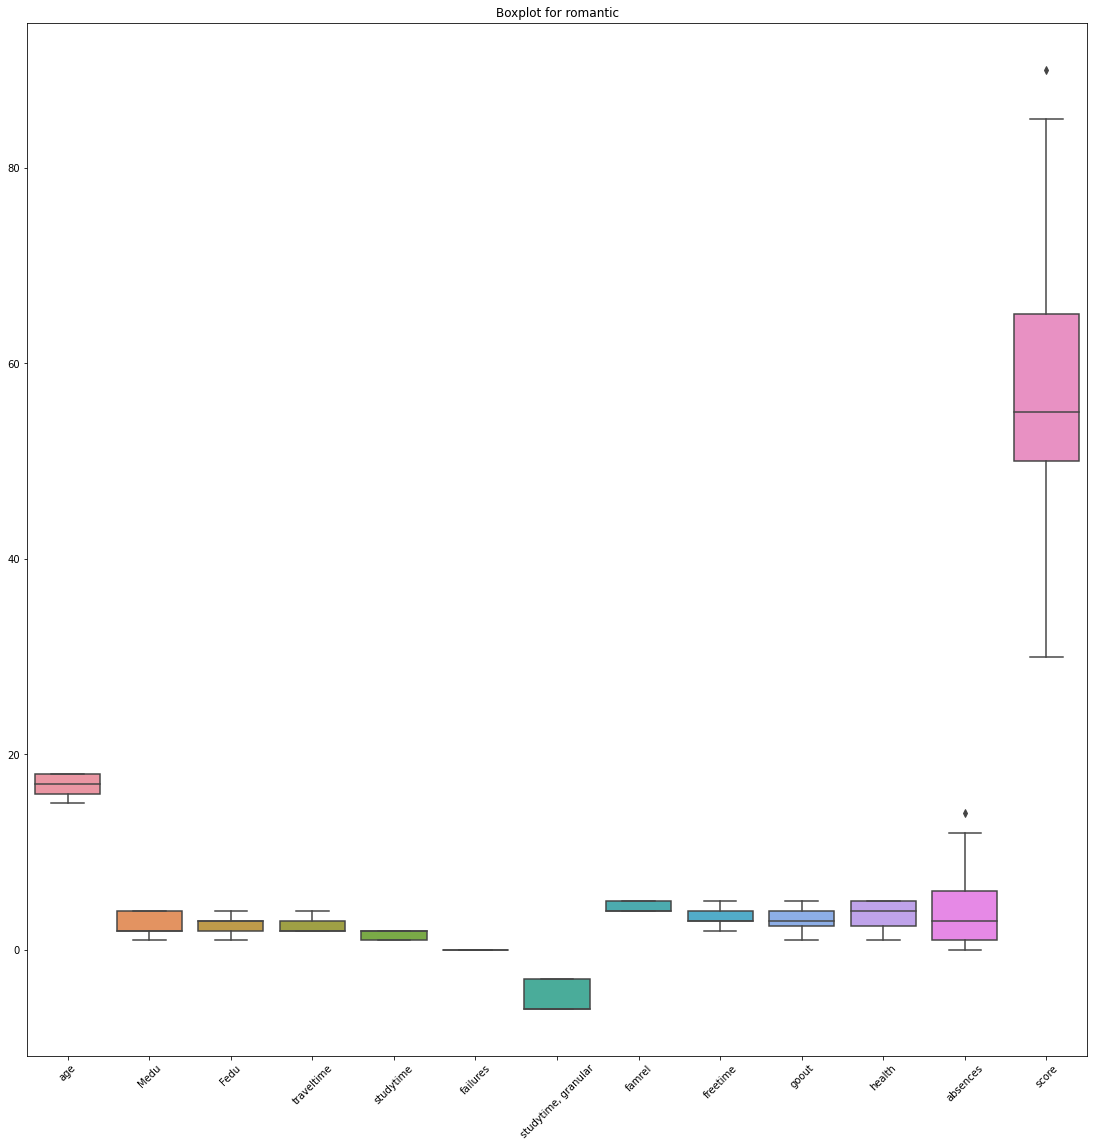

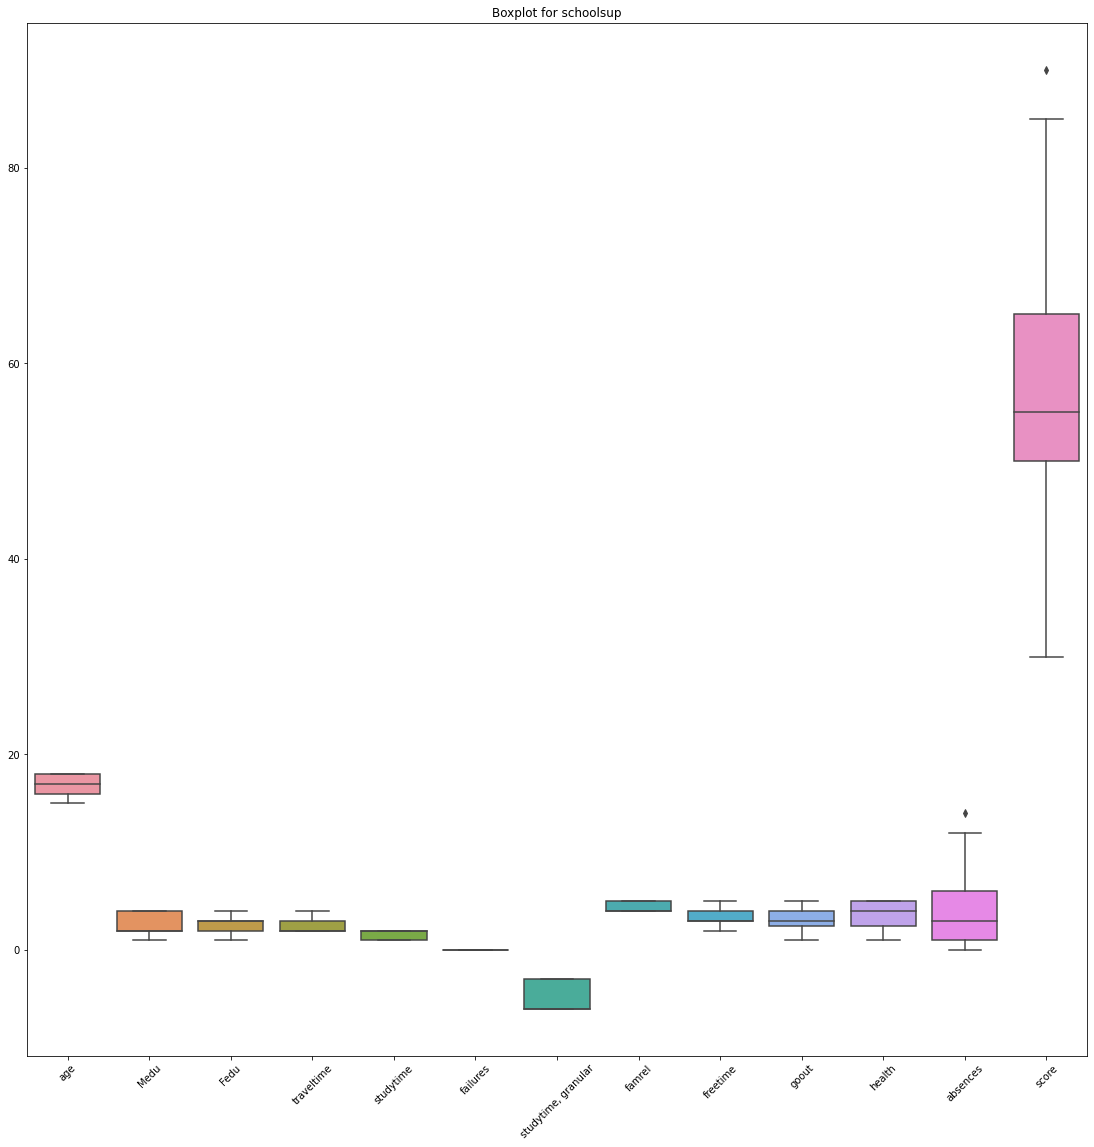

In [610]:
for col in ['Mjob', 'Fjob', 'reason', 'famsup', 'paid','higher','internet','romantic','schoolsup']:
    get_boxplot(col)

In [621]:
def get_stat_dif(column):
    cols = child.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(str(child.loc[child.loc[:, column] == comb[0]]), 
                        child.loc[child.loc[:, column] == comb[1]]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [619]:
for col in ['Mjob', 'Fjob', 'reason', 'famsup', 'paid','higher','internet','romantic','schoolsup']:
    get_stat_dif(col)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [613]:
child_for_model = child.loc[:, ['Mjob', 'Fjob', 'reason', 'famsup', 'paid','higher','internet','romantic','schoolsup']]
child_for_model.head()

,Mjob,Fjob,reason,famsup,paid,higher,internet,romantic,schoolsup
0,at_home,teacher,course,no,no,yes,yes,no,yes
13,teacher,other,course,yes,yes,yes,yes,no,no
17,other,other,reputation,yes,no,yes,no,no,yes
23,other,other,reputation,yes,no,yes,yes,no,no
31,services,other,reputation,yes,no,yes,yes,no,no
